<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Разделим-данные-на-выборки" data-toc-modified-id="Разделим-данные-на-выборки-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Разделим данные на выборки</a></span></li><li><span><a href="#Краткий-вывод" data-toc-modified-id="Краткий-вывод-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Краткий вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Модель-&quot;Логистическая-регрессия&quot;" data-toc-modified-id="Модель-&quot;Логистическая-регрессия&quot;-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Модель "Логистическая регрессия"</a></span></li><li><span><a href="#Модель-&quot;Дерево-решений&quot;" data-toc-modified-id="Модель-&quot;Дерево-решений&quot;-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Модель "Дерево решений"</a></span></li><li><span><a href="#Модель-&quot;Случайный-лес&quot;" data-toc-modified-id="Модель-&quot;Случайный-лес&quot;-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Модель "Случайный лес"</a></span></li><li><span><a href="#Краткий-вывод" data-toc-modified-id="Краткий-вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Краткий вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Модель-&quot;Логистическая-регрессия&quot;" data-toc-modified-id="Модель-&quot;Логистическая-регрессия&quot;-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Модель "Логистическая регрессия"</a></span></li><li><span><a href="#Модель-&quot;Дерево-решений&quot;" data-toc-modified-id="Модель-&quot;Дерево-решений&quot;-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Модель "Дерево решений"</a></span></li><li><span><a href="#Модель-&quot;Случайный-лес&quot;" data-toc-modified-id="Модель-&quot;Случайный-лес&quot;-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Модель "Случайный лес"</a></span></li><li><span><a href="#Краткий-вывод" data-toc-modified-id="Краткий-вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Краткий вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Построим модель с предельно большим значением *F1*-меры. Нужно довести метрику до 0.59. Проверим *F1*-меру на тестовой выборке.
Дополнительно будем измерять *AUC-ROC*, сравнивая её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

<b>Описание данных:</b><br>
<i>Признаки</i><br>
- `RowNumber` — индекс строки в данных<br>
- `CustomerId` — уникальный идентификатор клиента<br>
- `Surname` — фамилия<br>
- `CreditScore` — кредитный рейтинг<br>
- `Geography` — страна проживания<br>
- `Gender` — пол<br>
- `Age` — возраст<br>
- `Tenure` — сколько лет человек является клиентом банка<br>
- `Balance` — баланс на счёте<br>
- `NumOfProducts` — количество продуктов банка, используемых клиентом<br>
- `HasCrCard` — наличие кредитной карты<br>
- `IsActiveMember` — активность клиента<br>
- `EstimatedSalary` — предполагаемая зарплата<br>

<i>Целевой признак</i><br>
- `Exited` — факт ухода клиента

<b>План работы:</b><br>
- Загрузим и подготовим данные.
- Исследуем баланс классов и обучим модель без учёта дисбаланса.
- Улучшим качество модели, учитывая дисбаланс классов. Обучим разные модели и найдем лучшую. 
- В конце проведем финальное тестирование.

## Подготовка данных

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from tqdm.notebook import trange

Откроем файл и изучим данные.

In [3]:
df = pd.read_csv('Churn.csv', index_col=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Проверим данные на пропуски и дубликаты.

In [4]:
df.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [5]:
df.duplicated().sum()

0

Дубликатов нет, но в таблице есть пропуски! Нам известен источник данных, проверим данные там. При анализе источника выяснилось, что там пропуски отсутствуют. Возможно при выгрузке данных возникла ошибка. Загрузим оригинальные данные и будем работать с ними.<br>

p.s. если это сделано специально (в рамках урока, добавлены пропуски) и нужно заполнить пропуски, то при анализе этих данных ниже видно, что распределены они почти равномерно от 0 до 10 (за исключением 0 и 10). Тогда я бы эти 909 пропусков заполнил бы рандомно/равномерно от 0 до 10. Или второй вариант - запоплить пропуски медианой.

In [6]:
df['Tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

Загрузим правильные оригинальные данные без пропусков и будем работать с ними.

In [7]:
df = pd.read_csv('Churn_Modelling.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.duplicated().sum()

0

Как видим - пропусков нет!

In [10]:
df['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [11]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


В таблице есть данные, которые нам не нужны для исследования и обучения модели - колонки RowNumber, CustomerId и Surname. Удалим их.

In [12]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace=True)

In [13]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [14]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Проверим на уникальность и неявные дубликаты.

In [15]:
print(df['Geography'].unique())
print(df['Gender'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']


У нас есть 2 колонки с категориальными признаками, обработаем их методом OHE (One-Hot Encoding). Техникой OHE категориальные признаки переводятся в численные. Чтобы не попасть в дамми-ловушку удалим лишние столбцы.

In [16]:
df = pd.get_dummies(df, drop_first=True)

In [17]:
df.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0


### Разделим данные на выборки

Разделим данные по признакам - общие и целевые

In [18]:
features, target = df.drop('Exited', axis=1), df['Exited']

Теперь выделим 3 выборки - обучающую, валидационную и тестовую в соотношении 3:1:1

In [19]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.4, random_state=333, stratify=target)

In [20]:
features_valid, features_test, target_valid, target_test = train_test_split(
    features_test, target_test, test_size=0.5, random_state=333, stratify=target_test)

In [21]:
pd.DataFrame({
    'data_all': [features.shape[0]],
    'data_train': [features_train.shape[0]],
    'data_valid': [features_valid.shape[0]],
    'data_test': [features_test.shape[0]]
})

,data_all,data_train,data_valid,data_test
0,10000,6000,2000,2000


Получили нужное разделение.

Сделаем стандартизацию данных (масштабирование численных признаков).

In [22]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

pd.options.mode.chained_assignment = None
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [23]:
features_train.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9433,-0.076051,0.012607,0.691825,-1.221219,0.808030,1,1,1.214939,0,0,1
6818,0.492383,0.201717,-0.685855,0.226459,-0.911793,1,1,-1.491601,0,0,1


### Краткий вывод

Открыли файл и изучили данные. Найдены пропуски в данных, загрузили оригинальные данные без пропусков. Удалили не нужные колонки данных. Колонки с категориальными данными перевели перевели в численные. Сделали стандартизацию данных (масштабирование численных признаков). Разделили данные на выборки.

## Исследование задачи

Проверим сбалансированность классов в таргете

In [24]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

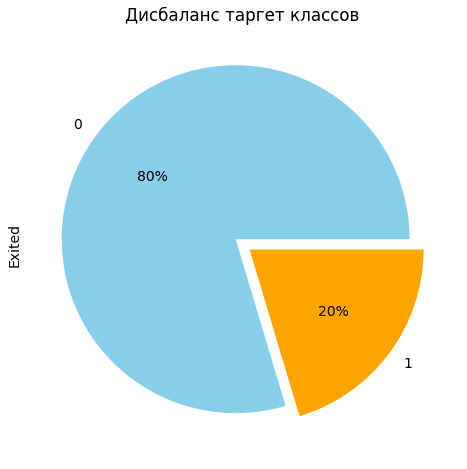

In [25]:
plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(8, 8))
df['Exited'].value_counts().plot(
    kind='pie',
    autopct='%1.0f%%',
    colors=['skyblue', 'orange'],
    explode=(0.05, 0.05))
plt.title('Дисбаланс таргет классов')
plt.show()

Сбалансированность классов в таргете 80/20.

### Модель "Логистическая регрессия"

Рассмотрим модель <b>"Логистической регрессия"</b>.

In [26]:
log_model = LogisticRegression(random_state=333, solver='lbfgs', max_iter=1000)
log_model.fit(features_train, target_train)
predict_train = log_model.predict(features_train)
predict_valid = log_model.predict(features_valid)

In [27]:
print('f1 метрика на тренировочной выборке:', f1_score(target_train, predict_train))
print('f1 метрика на валидационной выборке:', f1_score(target_valid, predict_valid))

f1 метрика на тренировочной выборке: 0.3097238895558223
f1 метрика на валидационной выборке: 0.31215970961887474


Получили маленький f1 score. Логистическая регрессия явно не подходит.

Напишем функцию отображения ROC-кривой

In [28]:
def draw_roc(fpr, tpr):
    plt.figure(figsize=(8, 6))
    plt.plot([0, 1], [0, 1], linestyle='--',)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.show()

Посмотрим на ROC-кривую и roc-auc метрику

In [29]:
predict_proba_one = log_model.predict_proba(features_valid)[:, 1]

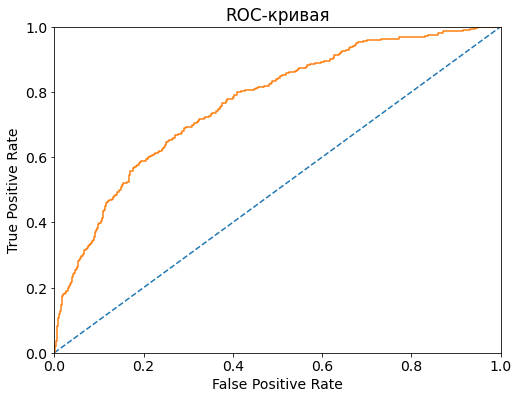

In [30]:
fpr, tpr, thresholds = roc_curve(target_valid, predict_proba_one)
draw_roc(fpr, tpr)

In [31]:
print('roc_auc score:', roc_auc_score(target_valid, predict_valid))

roc_auc score: 0.5874901468124938


Метрика немного выше случайной модели, на графике это тоже хорошо видно.

### Модель "Дерево решений"

Рассмотрим модель <b>"Дерево решений"</b>. Переберем в алгоритме обучения разные варианты гиперпараметров.

In [32]:
%%time
param = {
    'max_depth': range(1, 30),
    'min_samples_split': range(2, 10),
    'max_features': range(3, 10)
}

tree_model = DecisionTreeClassifier(random_state=333)
clf = GridSearchCV(tree_model, param, scoring='f1', cv=5, n_jobs=-1)
clf.fit(features_train, target_train)

CPU times: user 17.4 s, sys: 22.2 ms, total: 17.5 s
Wall time: 17.5 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=333),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 20), 'max_features': range(3, 6),
                         'min_samples_split': range(2, 8)},
             scoring='f1')

In [33]:
tree_model = clf.best_estimator_
print('Лучшие параметры:', clf.best_params_)

Лучшие параметры: {'max_depth': 8, 'max_features': 5, 'min_samples_split': 5}


In [34]:
predict_train = tree_model.predict(features_train)
predict_valid = tree_model.predict(features_valid)

In [35]:
print('f1 метрика на тренировочной выборке:', f1_score(target_train, predict_train))
print('f1 метрика на валидационной выборке:', f1_score(target_valid, predict_valid))

f1 метрика на тренировочной выборке: 0.6191169335274137
f1 метрика на валидационной выборке: 0.5779685264663805


Дерево решений показало намного лучше результат, но недостаточно хороший.

Посмотрим на ROC-кривую и roc-auc метрику

In [36]:
predict_proba_one = tree_model.predict_proba(features_valid)[:, 1]

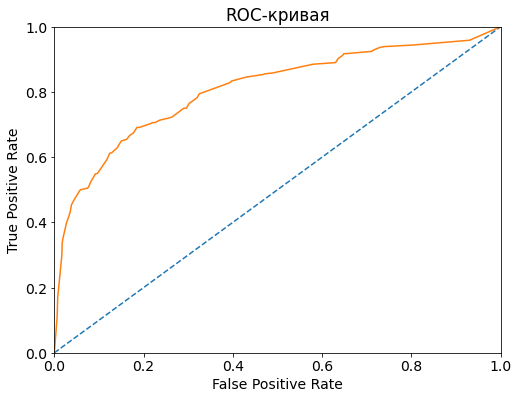

In [37]:
fpr, tpr, thresholds = roc_curve(target_valid, predict_proba_one)

draw_roc(fpr, tpr)

In [38]:
print(roc_auc_score(target_valid, predict_valid))

0.7195967583013105


ROC AUC метрика получилась не плохая, распределение немного смещено.

### Модель "Случайный лес"

Далее рассмотрим модель "случайный лес", предположительно у нее должны получиться более высокие метрики. Переберем в алгоритме обучения разные варианты гиперпараметров.

In [39]:
%%time
param = {
    'n_estimators': [80, 120, 160, 240],
    'max_depth': [6, 12, 16],
    'max_features': [2, 4, 6]
}

rf_model = RandomForestClassifier(random_state=333)
clf = GridSearchCV(rf_model, param, scoring='f1', cv=5, n_jobs=-1)
clf.fit(features_train, target_train)

CPU times: user 2min 14s, sys: 558 ms, total: 2min 15s
Wall time: 2min 15s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=333),
             n_jobs=-1,
             param_grid={'max_depth': [6, 12, 16], 'max_features': [2, 4, 6],
                         'n_estimators': [80, 120, 160, 240]},
             scoring='f1')

In [40]:
rf_model = clf.best_estimator_
print('Лучшие параметры:', clf.best_params_)

Лучшие параметры: {'max_depth': 12, 'max_features': 6, 'n_estimators': 120}


In [41]:
predict_train = rf_model.predict(features_train)
predict_valid = rf_model.predict(features_valid)

In [42]:
print('f1 метрика на тренировочной выборке:', f1_score(target_train, predict_train))
print('f1 метрика на валидационной выборке:', f1_score(target_valid, predict_valid))

f1 метрика на тренировочной выборке: 0.858325666973321
f1 метрика на валидационной выборке: 0.5877061469265368


Получили метрику еще выше. Посмотрим на ROC-кривую и roc-auc метрику.

In [43]:
predict_proba_one = rf_model.predict_proba(features_valid)[:, 1]

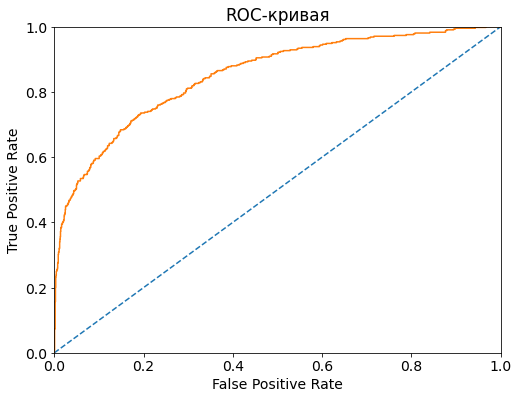

In [44]:
fpr, tpr, thresholds = roc_curve(target_valid, predict_proba_one)

draw_roc(fpr, tpr)

In [45]:
print(roc_auc_score(target_valid, predict_valid))

0.7204096462705686


Получили метрику еще больше и более ровну кривую.

### Краткий вывод

Имеем дисбаланс таргет класса 80/20.<br>
На не сбалансированных данных логистическая регрессия показала очень плохой результат метрики f1 score - 0.312 и roc_auc score: 0.587.<br>
Дерево решений показало результат намного больше - f1 score - 0.578 и roc_auc score: 0.720.<br>
Случайный лес дал самый лучший результат - f1 score - 0.587 и roc_auc score: 0.720.

## Борьба с дисбалансом

Проведем тестирование моделей с учет дисбаланса

### Модель "Логистическая регрессия"

Рассмотрим модель <b>"Логистической регрессия"</b>.

Попробуем уменьшение выборки (downsampling), сделаем объекты частого класса не такими частыми.

Напишем функцию уменьшения выборки:

In [46]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [47]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.2)

log_model = LogisticRegression(random_state=333, solver='lbfgs', max_iter=1000)
log_model.fit(features_downsampled, target_downsampled)
predict_train = log_model.predict(features_train)
predict_valid = log_model.predict(features_valid)

print('f1 метрика на тренировочной выборке:', f1_score(target_train, predict_train))
print('f1 метрика на валидационной выборке:', f1_score(target_valid, predict_valid))

f1 метрика на тренировочной выборке: 0.4780735107731305
f1 метрика на валидационной выборке: 0.47175572519083975


Получили хорошие результаты.<br>
Теперь попробуем взвешивание классов (аналог или наверное тоже самое, что и увеличение выборки - upsampling).

In [48]:
log_model = LogisticRegression(random_state=333, solver='lbfgs', max_iter=1000, class_weight='balanced')
log_model.fit(features_train, target_train)
predict_train = log_model.predict(features_train)
predict_valid = log_model.predict(features_valid)

In [49]:
print('f1 метрика на тренировочной выборке:', f1_score(target_train, predict_train))
print('f1 метрика на валидационной выборке:', f1_score(target_valid, predict_valid))

f1 метрика на тренировочной выборке: 0.4907621247113164
f1 метрика на валидационной выборке: 0.48378615249780893


С балансом весов классов получили результаты выше. Посмотрим на ROC-кривую и roc-auc метрику.

In [50]:
predict_proba_one = log_model.predict_proba(features_valid)[:, 1]

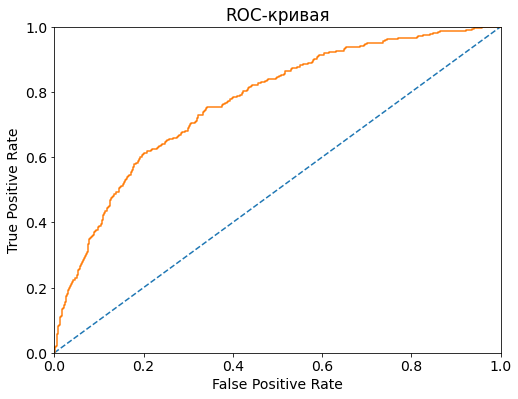

In [51]:
fpr, tpr, thresholds = roc_curve(target_valid, predict_proba_one)

draw_roc(fpr, tpr)

In [52]:
print(roc_auc_score(target_valid, predict_valid))

0.6947051433638782


Аналогично получили результаты лучше предыдущих.

### Модель "Дерево решений"

Рассмотрим модель <b>"Дерево решений"</b> с балансом классов.

Протестируем downsampling.

In [53]:
%%time
param = {
    'max_depth': range(1, 20),
    'min_samples_split': range(2, 8),
    'max_features': [3, 6, 9]
}

tree_model = DecisionTreeClassifier(random_state=333)
clf = GridSearchCV(tree_model, param, scoring='f1', cv=5, n_jobs=-1)
clf.fit(features_downsampled, target_downsampled)

tree_model = clf.best_estimator_
print('Лучшие параметры:', clf.best_params_)

Лучшие параметры: {'max_depth': 5, 'max_features': 9, 'min_samples_split': 2}
CPU times: user 11.9 s, sys: 19.8 ms, total: 11.9 s
Wall time: 12 s


In [54]:
predict_train = tree_model.predict(features_train)
predict_valid = tree_model.predict(features_valid)
print('f1 метрика на тренировочной выборке:', f1_score(target_train, predict_train))
print('f1 метрика на валидационной выборке:', f1_score(target_valid, predict_valid))

f1 метрика на тренировочной выборке: 0.5649891941957395
f1 метрика на валидационной выборке: 0.5539906103286384


Результаты ниже, чем на несбалансированной выборке.

In [55]:
%%time
param = {
    'max_depth': range(1, 20),
    'min_samples_split': range(2, 8),
    'max_features': [3, 6, 9],
    'class_weight': ['balanced']
}

tree_model = DecisionTreeClassifier(random_state=333)
clf = GridSearchCV(tree_model, param, scoring='f1', cv=5, n_jobs=-1)
clf.fit(features_train, target_train)

tree_model = clf.best_estimator_
print('Лучшие параметры:', clf.best_params_)

Лучшие параметры: {'class_weight': 'balanced', 'max_depth': 7, 'max_features': 9, 'min_samples_split': 3}
CPU times: user 21.8 s, sys: 47.9 ms, total: 21.8 s
Wall time: 21.8 s


In [56]:
predict_train = tree_model.predict(features_train)
predict_valid = tree_model.predict(features_valid)
print('f1 метрика на тренировочной выборке:', f1_score(target_train, predict_train))
print('f1 метрика на валидационной выборке:', f1_score(target_valid, predict_valid))

f1 метрика на тренировочной выборке: 0.6196319018404908
f1 метрика на валидационной выборке: 0.5617566331198536


При взвешивании классов показатели выше.

Посмотрим на ROC-кривую и roc-auc метрику

In [57]:
predict_proba_one = tree_model.predict_proba(features_valid)[:, 1]

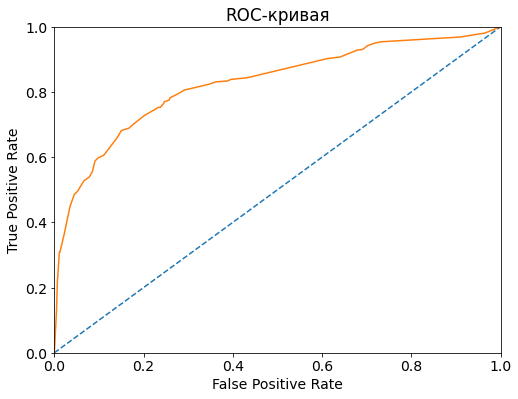

In [58]:
fpr, tpr, thresholds = roc_curve(target_valid, predict_proba_one)

draw_roc(fpr, tpr)

In [59]:
print(roc_auc_score(target_valid, predict_valid))

0.7575068972312543


На сбалансированных данных с уменьшением семплов дерево решений на валидационной выборке показало результат f1 score ниже - 0.554, против 0.578 на не сбалансированных данных. При взвешивании классов показатели несного выше.

А вот roc_auc score вырос - 0.758 против 0.720 на не сбалансированной выборке.

### Модель "Случайный лес"

Теперь рассмотрим модель "случайный лес" с балансировкой классов.

Протестируем downsampling.

In [60]:
%%time
param = {
    'n_estimators': [120],
    'max_depth': [12],
    'min_samples_split': [8],
    'max_features': [6]
}

rf_model = RandomForestClassifier(random_state=333)
clf = GridSearchCV(rf_model, param, scoring='f1', cv=3, n_jobs=-1)
clf.fit(features_downsampled, target_downsampled)

rf_model = clf.best_estimator_
print('Лучшие параметры:', clf.best_params_)

Лучшие параметры: {'max_depth': 12, 'max_features': 6, 'min_samples_split': 8, 'n_estimators': 120}
CPU times: user 1.35 s, sys: 11.9 ms, total: 1.36 s
Wall time: 1.37 s


In [61]:
predict_train = rf_model.predict(features_train)
predict_valid = rf_model.predict(features_valid)
print('f1 метрика на тренировочной выборке:', f1_score(target_train, predict_train))
print('f1 метрика на валидационной выборке:', f1_score(target_valid, predict_valid))

f1 метрика на тренировочной выборке: 0.6833673172152637
f1 метрика на валидационной выборке: 0.5522648083623694


Результаты ниже, чем на несбалансированной выборке.

In [62]:
%%time
param = {
    'n_estimators': [120],
    'max_depth': [12],
    'min_samples_split': [8],
    'max_features': [6],
    'class_weight': ['balanced']
}

rf_model = RandomForestClassifier(random_state=333)
clf = GridSearchCV(rf_model, param, scoring='f1', cv=3, n_jobs=-1)
clf.fit(features_train, target_train)

rf_model = clf.best_estimator_
print('Лучшие параметры:', clf.best_params_)

Лучшие параметры: {'class_weight': 'balanced', 'max_depth': 12, 'max_features': 6, 'min_samples_split': 8, 'n_estimators': 120}
CPU times: user 2.97 s, sys: 15.7 ms, total: 2.99 s
Wall time: 3 s


In [63]:
predict_train = rf_model.predict(features_train)
predict_valid = rf_model.predict(features_valid)
print('f1 метрика на тренировочной выборке:', f1_score(target_train, predict_train))
print('f1 метрика на валидационной выборке:', f1_score(target_valid, predict_valid))

f1 метрика на тренировочной выборке: 0.8739232576350822
f1 метрика на валидационной выборке: 0.6127450980392157


При взвешивании классов получили метрику выше, чем при downsampling и несбалансированной выборки. Посмотрим на ROC-кривую и roc-auc метрику.

In [64]:
predict_proba_one = rf_model.predict_proba(features_valid)[:, 1]

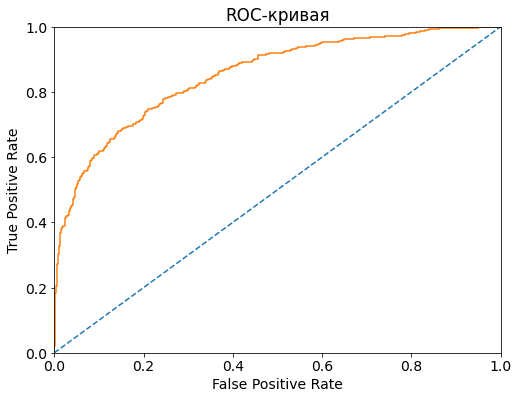

In [65]:
fpr, tpr, thresholds = roc_curve(target_valid, predict_proba_one)

draw_roc(fpr, tpr)

In [66]:
print(roc_auc_score(target_valid, predict_valid))

0.7567494334417184


roc-auc метрика стала выше.

### Краткий вывод

Взвешивание классов дает лучше результат, чем уменьшение выборки (downsampling).<br>
На логистической регрессии с балансом классов получили результаты f1 score выше. Roc-auc тоже получили результаты лучше предыдущих.<br>
На сбалансированных данных дерево решений на валидационной выборке показало результат f1 score ниже - 0.562, против 0.578 на не сбалансированных данных. А вот roc_auc score вырос - 0.758.<br>
Случайный лес дал лучший результат - получили метрики еще выше, f-score - 0.612 и roc-auc - 0.756.

## Тестирование модели

Выберем модель "случайный лес" и обучим на большой выборке - train + valid.

In [67]:
big_features = pd.concat([features_train, features_valid])
big_target = pd.concat([target_train, target_valid])

Проверим модель на тестовой выборке обученную только на тренировочных данных и на тренировочные + валидационные:

In [68]:
rf_model.fit(features_train, target_train)
predict_test = rf_model.predict(features_test)
print('f1 метрика на тестовых данных, обучение только на выборке train:', f1_score(target_test, predict_test))

f1 метрика на тестовых данных, обучение только на выборке train: 0.6150000000000001


In [69]:
rf_model.fit(big_features, big_target)
predict_test = rf_model.predict(features_test)
print('f1 метрика на тестовых данных, обучение на выборке train + valid:', f1_score(target_test, predict_test))

f1 метрика на тестовых данных, обучение на выборке train + valid: 0.6402966625463535


Получили высокую f-score метрику с обучением на объединенных данных. Посмотрим на roc-кривую и roc-auc скоринг.

In [70]:
predict_proba_one = rf_model.predict_proba(features_test)[:, 1]

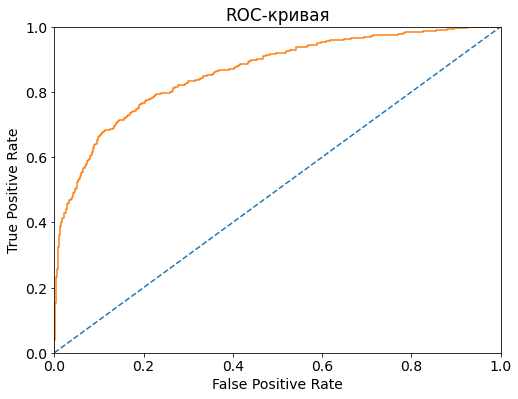

In [71]:
fpr, tpr, thresholds = roc_curve(target_test, predict_proba_one)

draw_roc(fpr, tpr)

In [72]:
print(roc_auc_score(target_test, predict_test))

0.7732979512640529


Хорошие показатели, кривая гладкая без провалов.

## Вывод

Загрузили и изучили данные. Найдены пропуски в данных, загрузили оригинальные данные без пропусков. Удалили не нужные колонки данных. Колонки с категориальными данными перевели перевели в численные. Сделали стандартизацию данных (масштабирование численных признаков). Разделили данные на выборки.

Имеем дисбаланс таргет класса 80/20.
На не сбалансированных данных логистическая регрессия показала очень плохой результат метрики f1 score - 0.312 и roc_auc score: 0.587.
Дерево решений показало результат намного больше - f1 score - 0.578 и roc_auc score: 0.720.
Случайный лес дал самый лучший результат - f1 score - 0.587 и roc_auc score: 0.720.

Взвешивание классов дает лучше результат, чем уменьшение выборки (downsampling).
На логистической регрессии с балансом классов получили результаты f1 score выше. Roc-auc тоже получили результаты лучше предыдущих.
На сбалансированных данных дерево решений на валидационной выборке показало результат f1 score ниже - 0.562, против 0.578 на не сбалансированных данных. А вот roc_auc score вырос - 0.758.
Случайный лес дал лучший результат - получили метрики еще выше, f-score - 0.612 и roc-auc - 0.756.

Для финального теста выбрали модель "случайный лес". Обучили модель на общей большой выборке данных: тренировочные + валидационные. На тестовой выборке получили хорошие результаты метрик: f-score - 0.640 и roc-auc - 0.773.